# 1. Introduction and Business Problem
Jewelry sales are influenced by many factors:materials, brands, styles, seasons, and even customer types. Our goal was to use advanced data analysis to better understand what drives jewelry prices, clean up our messy data, and build models that can predict prices more accurately. Ultimately, this helps the business set the right prices, spot opportunities, and avoid costly mistakes.

# 2. Library Import and Initial Setup
This section imports all necessary libraries such as pandas, matplotlib, seaborn, etc., which are required for data manipulation, visualization, and modeling. These libraries provide the foundational tools needed for data processing and visualization. Without them, analysis and modeling wouldn't be possible.

In [159]:
import warnings
warnings.filterwarnings("ignore")


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# 3. Data Loading, Inspection,and Data Understanding for EDA
This part reads the dataset into memory (most likely using pd.read_csv or similar) and performs an initial inspection using .head(), .info(), or .describe(). To understand the structure, types, and quality of data. It helps in planning the cleaning and transformation stages. In this stage the following steps are carried out. 

## A. What was done?
i.Loaded the Data:We started by bringing in a large spreadsheet (almost 100,000 records) of jewelry orders, each with columns like the product type, material, gem, order date, brand, customer, and—importantly—the price paid.

ii.Explored the Data: We looked for missing values, outliers, or suspicious entries (e.g., jewelry without a gem, impossible dates, or products with a price of zero).

In [161]:
df = pd.read_csv("../data/Jewelry_Dataset.csv")
df.head()

,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1806829201890738522,jewelry.earring,0,561.51,1515915625207851155,Unnamed: 9,red,gold,diamond
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [162]:
columns = [
    'Order datetime', 'Order ID', 'Purchased product ID', 'Quantity of SKU in the order',
    'Category ID', 'Category alias', 'Brand ID', 'Price in USD', 'User ID',
    'Product gender', 'Main Color', 'Main metal', 'Main gem'
]


In [163]:
df = pd.read_csv("../data/Jewelry_Dataset.csv", header=None, names=columns)
df.head(n=5)

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem
0,2018-12-01 11:40:29 UTC,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond
1,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
2,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
3,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
4,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst


In [164]:
# Check the column names
print(df.columns)


Index(['Order datetime', 'Order ID', 'Purchased product ID',
       'Quantity of SKU in the order', 'Category ID', 'Category alias',
       'Brand ID', 'Price in USD', 'User ID', 'Product gender', 'Main Color',
       'Main metal', 'Main gem'],
      dtype='object')


In [165]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the column names again to ensure there are no spaces
print(df.columns)


Index(['Order datetime', 'Order ID', 'Purchased product ID',
       'Quantity of SKU in the order', 'Category ID', 'Category alias',
       'Brand ID', 'Price in USD', 'User ID', 'Product gender', 'Main Color',
       'Main metal', 'Main gem'],
      dtype='object')


In [166]:
# Check for missing values
print(df.isnull().sum())

Order datetime                      0
Order ID                            0
Purchased product ID                0
Quantity of SKU in the order        0
Category ID                      5352
Category alias                   9933
Brand ID                         4785
Price in USD                     5352
User ID                          5352
Product gender                  48168
Main Color                       7660
Main metal                       5462
Main gem                        34058
dtype: int64


In [167]:
df.shape

(95911, 13)

In [168]:
# Check for unique values-feature cardinalty
df.nunique()

Order datetime                  74505
Order ID                        74760
Purchased product ID             9613
Quantity of SKU in the order        1
Category ID                        25
Category alias                    218
Brand ID                         2537
Price in USD                     3166
User ID                         31079
Product gender                      2
Main Color                          5
Main metal                          3
Main gem                           30
dtype: int64

In [169]:
# Data description
df.describe()

,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Brand ID,Price in USD,User ID
count,9.591100e+04,9.591100e+04,95911.0,9.055900e+04,9.112600e+04,90559.000000,9.055900e+04
mean,2.485185e+18,1.815970e+18,1.0,1.805947e+18,8.890938e+16,362.215217,1.512644e+18
std,1.934825e+17,2.136803e+17,0.0,2.083942e+16,3.559633e+17,444.155706,2.374763e+16
min,1.924719e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379723e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524276e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95911 entries, 0 to 95910
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order datetime                95911 non-null  object 
 1   Order ID                      95911 non-null  int64  
 2   Purchased product ID          95911 non-null  int64  
 3   Quantity of SKU in the order  95911 non-null  int64  
 4   Category ID                   90559 non-null  float64
 5   Category alias                85978 non-null  object 
 6   Brand ID                      91126 non-null  float64
 7   Price in USD                  90559 non-null  float64
 8   User ID                       90559 non-null  float64
 9   Product gender                47743 non-null  object 
 10  Main Color                    88251 non-null  object 
 11  Main metal                    90449 non-null  object 
 12  Main gem                      61853 non-null  object 
dtypes

# # 3b. Data Preprocessing
For this section, steps are carried out to preprocess the data. the steps involved are Dropping irrelevant columns (like Order ID, User ID, etc.), Handling missing or null values, Type conversion where needed. Cleaning ensures that the data is consistent and formatted correctly, enabling accurate analysis and modeling.

In [171]:
# Convert 'Order datetime' to pandas datetime type
df["Order datetime"] = pd.to_datetime(df["Order datetime"])

# Keep only date part (year, month, day)
df["Order date"] = df["Order datetime"].dt.date

In [172]:
# check for duplicate values
num_duplicated = len(df.loc[df.duplicated()])


In [173]:
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2589


In [174]:
# feature with cardinalty of 1(invariant feature)
invariant_features = df.nunique()[df.nunique() == 1].index.tolist()

In [175]:
invariant_features

['Quantity of SKU in the order']

In [176]:
# check for label distribution
df['Price in USD'].skew()

18.959088306248297

At the end of the data inspection and preprocessing. the following was notably observed, 

1. The dataset contains 13 columns, 95,911 rows.

2. There are Notable null values in:

  a. Category alias (13% missing),

  b. Product gender (50% missing),

  c. Main gem (35% missing),

3. Data types include: object, float64, and int64.

Interpretation of the observation above includes:

i. Some features have severe missingness (e.g. Product gender, Main gem) and would need imputation or exclusion.

ii. Order datetime, User ID, and Purchased product ID are likely identifiers and were later dropped in the analysis.

# 5. Exploratory Data analysis(EDA)
In this section, we performed Exploratory Data Analysis (EDA) to understand the distribution, relationships, and patterns in our jewelry sales data. EDA helps uncover hidden trends and guides our next steps in data cleaning, feature engineering, and modeling.

## A. Price Distribution Analysis
What we did:
We plotted the distribution of jewelry prices using a KDE (Kernel Density Estimate) plot. This visually shows how frequently different price points occur in the dataset.

Why it matters:
Understanding the price distribution reveals whether our data is skewed (with more low- or high-priced items) and if there are outliers or unusual pricing behaviors.

Insights:
Most jewelry items are clustered within a certain price range.

The presence of a "long tail" (few items with very high prices) can influence our modeling and requires special attention.

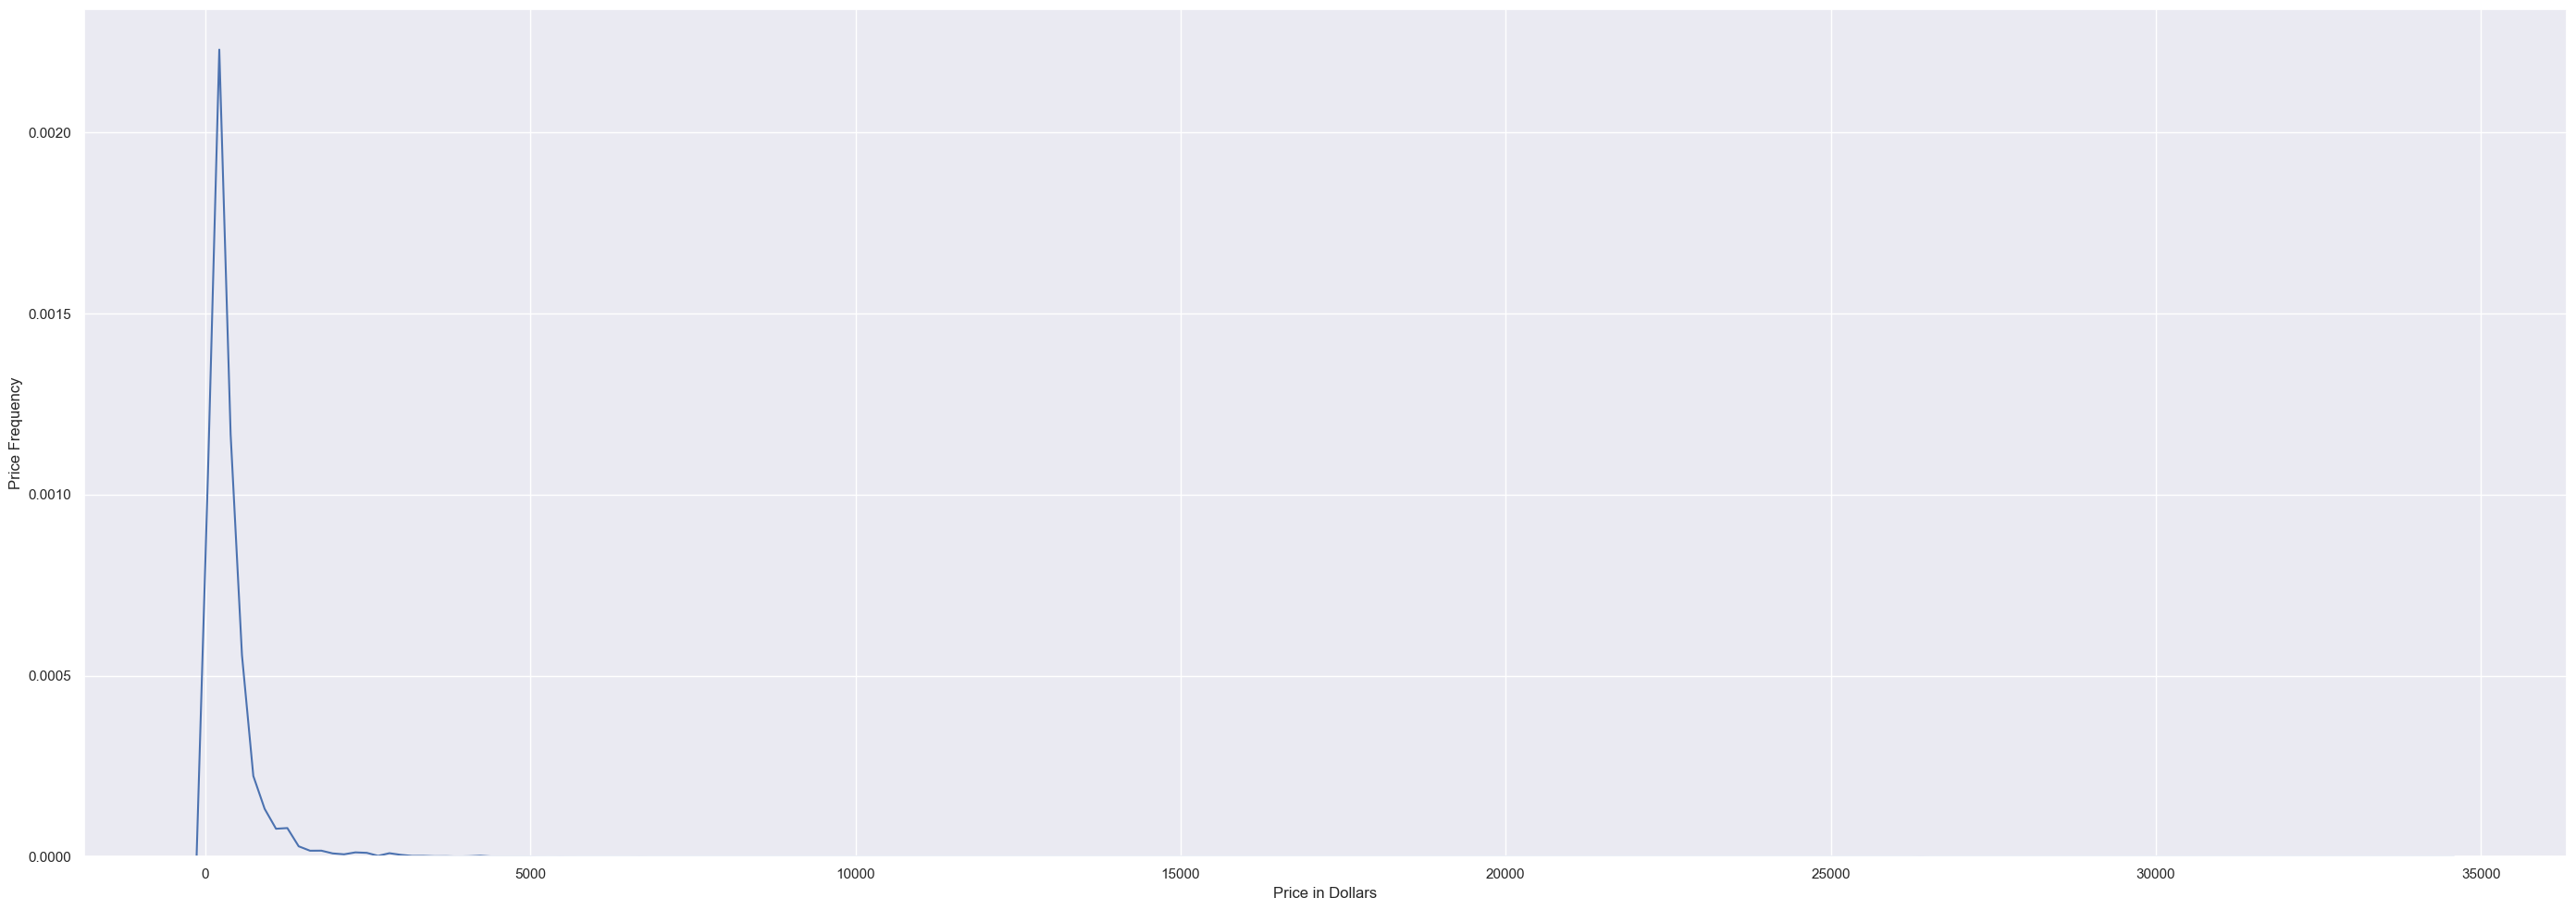

In [177]:
# Visualize Price Distribution
plt.figure(figsize = (28, 10))

sns.kdeplot(data=df, x= "Price in USD")

plt.xlabel('Price in Dollars')
plt.ylabel('Price Frequency')

plt.tight_layout()
plt.show(); plt.close()

## B. Price Kurtosis

What we did:
Calculated kurtosis for the price column.

Why it matters:
Kurtosis tells us how "peaked" or "flat" the price distribution is compared to a normal distribution. High kurtosis means more outliers—important for risk assessment and modeling.

In [178]:
# Price Kurtosis
df["Price in USD"].kurtosis()

1054.9045087611369

## C. Gender Analysis
What we did:

Counted how many jewelry products are associated with each gender (e.g., Female, Male, Unisex).

Visualized this with a count plot.

Why it matters:
Understanding gender distribution helps tailor marketing strategies and inventory decisions. For example, if most items are targeted at women, there may be a growth opportunity for men's or unisex jewelry.

Insights:

The dataset is skewed toward one gender, which may reflect market demand or data collection bias.

In [179]:
# Gender Analysis
df["Product gender"].value_counts()

f    47379
m      364
Name: Product gender, dtype: int64

In [180]:
# Gender Analysis
df["Product gender"].value_counts(normalize = True)

f    0.992376
m    0.007624
Name: Product gender, dtype: float64

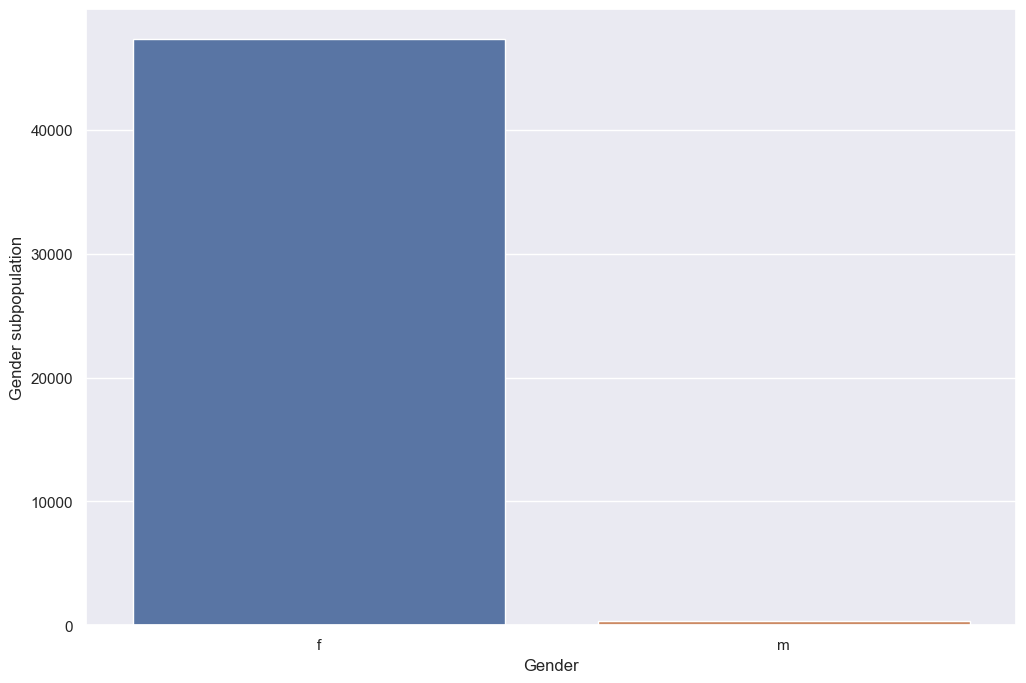

In [181]:
# visualize product gender
plt.figure(figsize = (12, 8))

sns.countplot(data=df, x= "Product gender")

plt.xlabel('Gender')
plt.ylabel('Gender subpopulation')

plt.show(); plt.close()

## C. Jewelry Category Exploration
What we did:

Listed and cleaned the unique jewelry categories.

Filtered out only actual jewelry categories for authentic data analysis.

Why it matters:
Identifying real product categories prevents misleading insights and ensures only relevant products are analyzed.

Insights:

Found a variety of unique jewelry categories, such as rings, necklaces, bracelets, etc

In [182]:
# Jewelry analysis
df["Category alias"].value_counts()

jewelry.earring     29052
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: Category alias, Length: 218, dtype: int64

In [183]:
df["Category alias"].unique()

array(['jewelry.earring', nan, 'jewelry.pendant', 'jewelry.necklace',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [184]:
# extract actual categories
categories = df['Category alias'].unique().tolist()

categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [185]:
categories

['jewelry.earring',
 'jewelry.pendant',
 'jewelry.necklace',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [186]:
# pick out authentic data based on categories
actual_categories = df.loc[df["Category alias"].isin(categories)]

## D. Missing Value Analysis
What we did:
Calculated the percentage of missing values across the whole dataset and within jewelry categories.

Why it matters:
Understanding where data is missing helps decide whether to impute (fill in) missing values, drop them, or investigate further.

In [187]:
# check percentage of missing values
100*df.isnull().sum()/len(df)

Order datetime                   0.000000
Order ID                         0.000000
Purchased product ID             0.000000
Quantity of SKU in the order     0.000000
Category ID                      5.580173
Category alias                  10.356476
Brand ID                         4.989000
Price in USD                     5.580173
User ID                          5.580173
Product gender                  50.221560
Main Color                       7.986571
Main metal                       5.694863
Main gem                        35.510004
Order date                       0.000000
dtype: float64

In [188]:
100*actual_categories.isnull().sum()/len(actual_categories)

Order datetime                   0.000000
Order ID                         0.000000
Purchased product ID             0.000000
Quantity of SKU in the order     0.000000
Category ID                      0.000000
Category alias                   0.000000
Brand ID                         4.309027
Price in USD                     0.000000
User ID                          0.000000
Product gender                  44.842715
Main Color                       2.656011
Main metal                       0.110615
Main gem                        24.232218
Order date                       0.000000
dtype: float64

## E. Price Distribution by Main Gem, Main Metal, and Main Color
I.Price Distribution by Main Gem
What we did:
Selected the top 10 most common gemstones.
Plotted boxplots of prices by each top gemstone.

Why it matters:
Shows which gems are associated with higher or lower prices, informing pricing, sourcing, and marketing.

Insights:
Certain gems command higher prices, suggesting premium segments.

II. Price Distribution by Main Metal
What we did:
Plotted how jewelry prices vary by the main metal used (e.g., gold, silver, platinum).

Why it matters:

Different metals have different base costs and customer perceptions.

Price variation across metals can inform product development and pricing strategy.

III. Price Distribution by Main Color
What we did:
Created a boxplot to visualize how the price varies by the color of the jewelry.

Why it matters:
Color may affect customer preferences and perceived value.


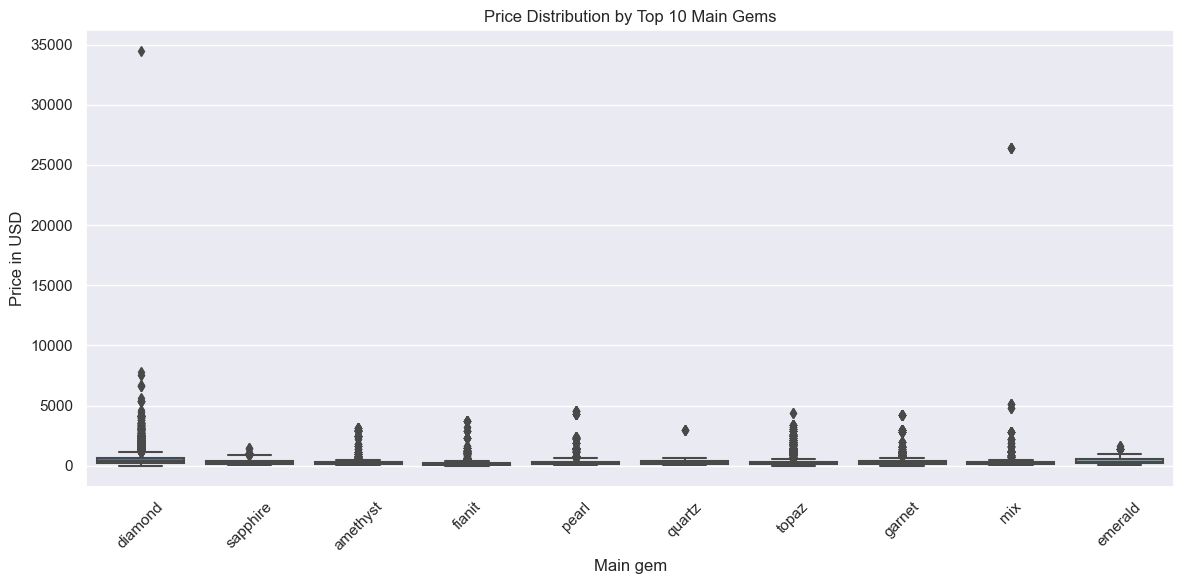

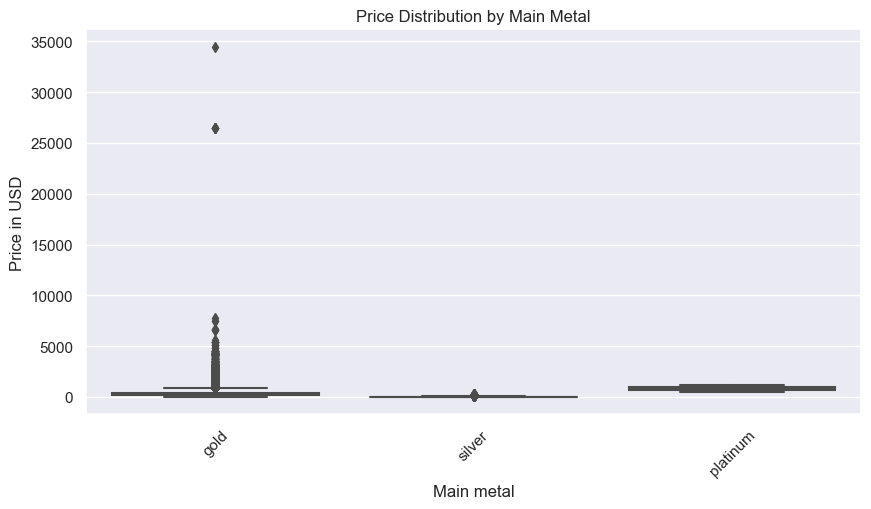

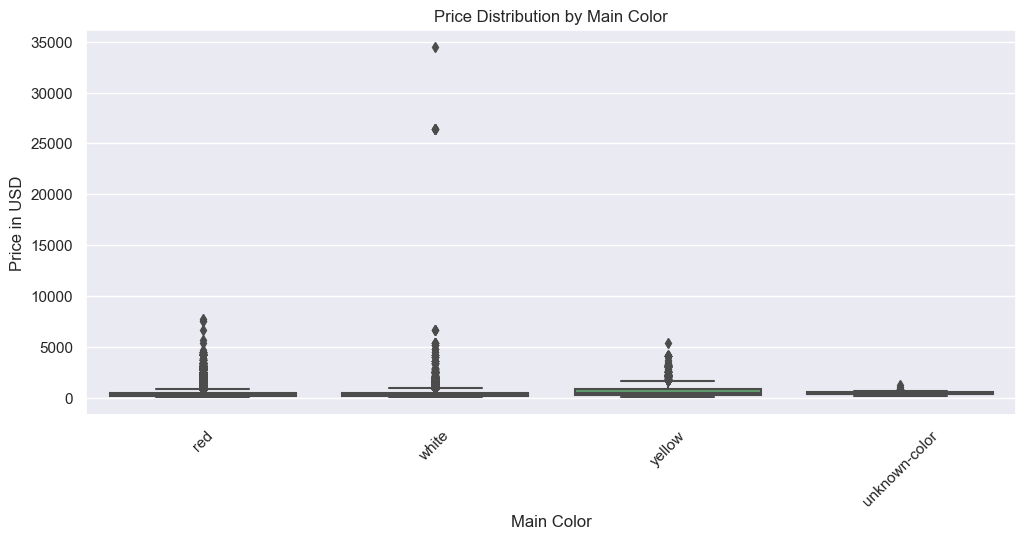

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the top 10 most common gems
top_gems = actual_categories['Main gem'].value_counts().index[:10]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x='Main gem', y='Price in USD',
    data=actual_categories[actual_categories['Main gem'].isin(top_gems)]
)
plt.xticks(rotation=45)
plt.title("Price Distribution by Top 10 Main Gems")
plt.tight_layout()
plt.show()


# Boxplot for Price vs Main metal
plt.figure(figsize=(10, 5))
sns.boxplot(x='Main metal', y='Price in USD', data=actual_categories)
plt.xticks(rotation=45)
plt.title("Price Distribution by Main Metal")
plt.show()

# Boxplot for Price vs Main Color
plt.figure(figsize=(12, 5))
sns.boxplot(x='Main Color', y='Price in USD', data=actual_categories)
plt.xticks(rotation=45)
plt.title("Price Distribution by Main Color")
plt.show()


## F. Category Distribution (Pie and Bar Charts)
What we did:

Created a pie chart and bar chart showing the proportion and frequency of each jewelry category.

Why it matters:
Helps identify the most and least common product types, which supports inventory management and marketing focus.

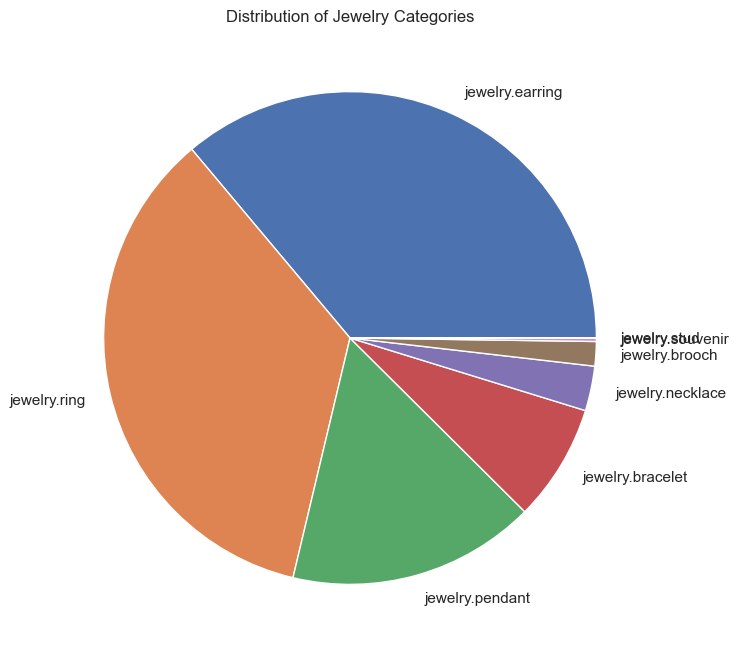

In [190]:
# visualize jewelry categories
subdata = actual_categories["Category alias"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12,8))

plt.pie(x = counts,  labels = jewelry_categories)

#plt.bar(jewelry_categories, counts)  # Create a bar chart
plt.title('Distribution of Jewelry Categories')  # Title of the chart
#plt.xlabel('Jewelry Categories')  # X-axis label
#plt.ylabel('Count')  # Y-axis label
#plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
#plt.tight_layout()  # Adjust layout to fit labels
#plt.show()

plt.show(); plt.close()

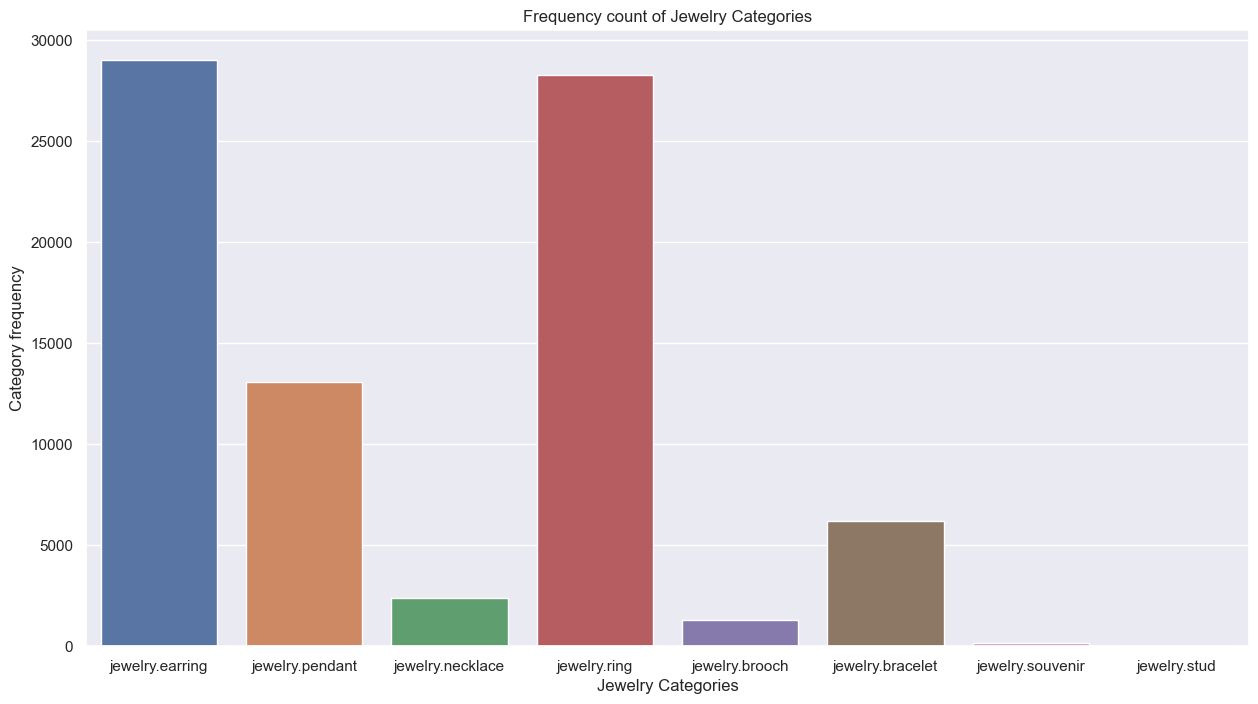

In [191]:
#category count plot
plt.figure(figsize=(15,8))

sns.countplot(data=actual_categories, x="Category alias")

plt.title('Frequency count of Jewelry Categories')
plt.xlabel('Jewelry Categories')  # X-axis label
plt.ylabel('Category frequency')

plt.show();plt.close()

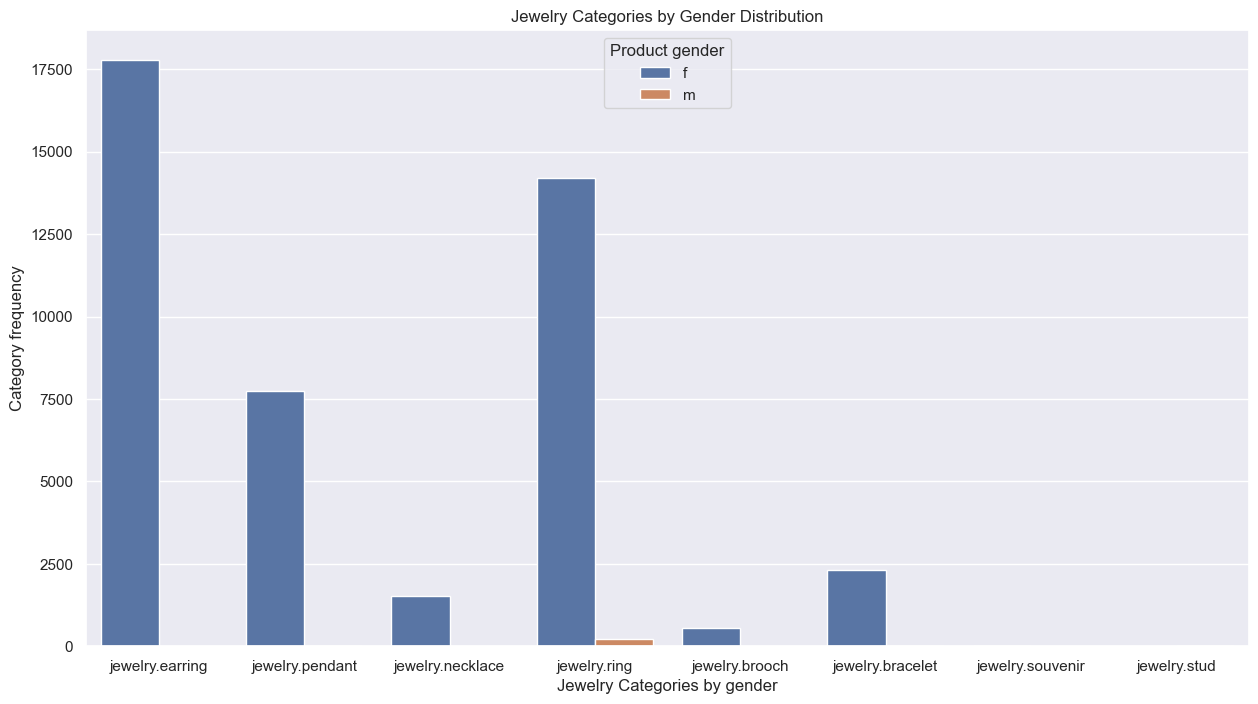

In [192]:
# Analyze jewelry category by gender
plt.figure(figsize =(15, 8))

sns.countplot(data=actual_categories, x="Category alias", hue ="Product gender")

plt.title('Jewelry Categories by Gender Distribution')  # Title of the chart
plt.xlabel('Jewelry Categories by gender')  # X-axis label
plt.ylabel('Category frequency')

plt.show();plt.close()

In [193]:
#Gender skew i original data
df["Product gender"].value_counts(normalize=True)

f    0.992376
m    0.007624
Name: Product gender, dtype: float64

In [194]:
actual_categories["Product gender"].value_counts(normalize=True)

f    0.994434
m    0.005566
Name: Product gender, dtype: float64

In [195]:
actual_categories.head()

,Order datetime,Order ID,Purchased product ID,Quantity of SKU in the order,Category ID,Category alias,Brand ID,Price in USD,User ID,Product gender,Main Color,Main metal,Main gem,Order date
0,2018-12-01 11:40:29+00:00,1924719191579951782,1842195256808833386,1,1.806829e+18,jewelry.earring,0.0,561.51,1.515916e+18,NaN,red,gold,diamond,2018-12-01
2,2018-12-02 13:53:42+00:00,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire,2018-12-02
3,2018-12-02 17:44:02+00:00,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond,2018-12-02
4,2018-12-02 21:30:19+00:00,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst,2018-12-02
5,2018-12-02 22:09:34+00:00,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN,2018-12-02


In [196]:
actual_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80459 entries, 0 to 95910
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   Order datetime                80459 non-null  datetime64[ns, UTC]
 1   Order ID                      80459 non-null  int64              
 2   Purchased product ID          80459 non-null  int64              
 3   Quantity of SKU in the order  80459 non-null  int64              
 4   Category ID                   80459 non-null  float64            
 5   Category alias                80459 non-null  object             
 6   Brand ID                      76992 non-null  float64            
 7   Price in USD                  80459 non-null  float64            
 8   User ID                       80459 non-null  float64            
 9   Product gender                44379 non-null  object             
 10  Main Color                    7832

## G. Summary of EDA Findings
1.Price distribution is right-skewed with a long tail of expensive items.

2.Gender distribution is imbalanced, suggesting a need for marketing focus or product diversification.

3.Category analysis shows which jewelry types are most popular and which are niche.

4.Certain gems and metals are clearly associated with higher prices.

5.Missing values need to be addressed in specific columns/categories.

6.Most categories are female-oriented, but opportunities exist to target other segments.

## H. Business Recommendations Based on EDA
1.Diversify Product Range:
Expand offerings in underrepresented categories (e.g., men's jewelry) to tap into new markets.

2.Premium Pricing Strategy:
Items with premium gems or metals can be marketed as luxury products with higher price points.

3.Targeted Marketing:
Use insights on category and gender skews to run more personalized marketing campaigns.

4.Data Quality Improvement:
Address missing values and ensure consistent data entry to improve analysis and modeling.

5.Inventory Optimization:
Align inventory with popular categories and high-margin items based on demand patterns.

# 6. Feature Engineering(Making Data More Useful)
Here correlation is checked and then The code creates a dictionary correlated_columns to store features that are moderately correlated.This section is implemented to reduce to reduce dimensionality and avoid overfitting in machine learning models by eliminating redundant features.

What was done?
Created New Features: We built new columns to capture business knowledge, such as:

Price Tier: Labeling items as “Low,” “Mid,” or “High” price.

Seasonality: Pulling out the month or day of week from the order date.

Customer Types: Marking if the buyer was a repeat customer.

Days Since First Order: To capture how old the product or customer relationship is.

Why does this matter?
These new features help the models “see” what a human would: For example, if rings sell more in December, or if customers pay more for “platinum” items.

In [197]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 1. Ensure 'Order datetime' is a datetime type
df["Order datetime"] = pd.to_datetime(df["Order datetime"])

# 2. Label encode all categorical columns (except the datetime column)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ["Order datetime", "Category alias"]]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# 3. Feature engineering
df["category"] = df["Category alias"]
df["price_tier"] = pd.qcut(df["Price in USD"], q=4, labels=["Low", "Mid-Low", "Mid-High", "High"])
df["price_tier"] = LabelEncoder().fit_transform(df["price_tier"].astype(str))
df["order_month"] = df["Order datetime"].dt.month
df["order_weekday"] = df["Order datetime"].dt.weekday

# -- More engineered features --

# Year of order
df["order_year"] = df["Order datetime"].dt.year

# Is weekend (1 if Saturday or Sunday, 0 otherwise)
df["is_weekend"] = df["Order datetime"].dt.weekday.isin([5,6]).astype(int)

# Days since first order
df["days_since_first_order"] = (df["Order datetime"] - df["Order datetime"].min()).dt.days

# Log of price (add 1 to avoid log(0))
df["log_price_usd"] = np.log1p(df["Price in USD"])

# Is repeat customer (has this User ID appeared before?)
df = df.sort_values("Order datetime")
df["is_repeat_customer"] = df.duplicated(subset=["User ID"]).astype(int)

# Placeholder for is_holiday (all 0 unless you supply a holiday list)
df["is_holiday"] = 0

# 4. Compute correlation matrix (exclude IDs and date columns)
drop_cols = ["Order datetime", "Order ID", "Purchased product ID", "User ID"]
corr_df = df.drop(columns=drop_cols, errors='ignore')
correlation = corr_df.corr(method="spearman")

# 5. Show outputs
print("Sample of engineered features:")
print(df[[
    "category", "price_tier", "order_month", "order_weekday", "order_year",
    "is_weekend", "days_since_first_order", "log_price_usd",
    "is_repeat_customer", "is_holiday"
]].head())

print("\nFeature correlation matrix:")
print(correlation)


Sample of engineered features:
           category  price_tier  order_month  order_weekday  order_year  \
0   jewelry.earring           0           12              5        2018   
1               NaN           3           12              5        2018   
2   jewelry.pendant           1           12              6        2018   
3   jewelry.pendant           1           12              6        2018   
4  jewelry.necklace           2           12              6        2018   

   is_weekend  days_since_first_order  log_price_usd  is_repeat_customer  \
0           1                       0       6.332409                   0   
1           1                       0       5.361949                   0   
2           1                       1       4.019262                   0   
3           1                       1       4.498698                   0   
4           1                       1       6.037083                   0   

   is_holiday  
0           0  
1           0  
2           0

## A. Encoding and Modeling
What was done?
Encoding: Computers don’t understand words like “gold” or “diamond.” We turned these into numbers, carefully making sure not to mix up categories.

Model Training: We split our data into two: one part to train the model, and one part to test if it actually works in the real world.

Model Types: We tried several models:

Linear Regression: A simple “line of best fit.”

Random Forest & XGBoost: More advanced, tree-based models that can capture complex patterns.

Why does this matter?
By converting our data into a language the computer understands, and using sophisticated models, we can predict jewelry prices based on their features with much better accuracy.

In [198]:
from sklearn.preprocessing import LabelEncoder

#from sklearn.preprocessing import LabelEncoder

# 1. List columns to drop (IDs/dates)
cols_to_drop = ["Order datetime", "Order ID", "Purchased product ID", "User ID"]

# 2. Make a copy to avoid changing your original DataFrame
df_encoded = df.copy()

# 3. Drop the ID/date columns (if they exist)
df_encoded = df_encoded.drop(columns=cols_to_drop, errors='ignore')

# 4. (Optional) Check if encoding is needed:
cat_cols = [col for col in df_encoded.select_dtypes(include=['object', 'category']).columns
            if col != 'Category alias']

if len(cat_cols) > 0:
    print("These columns need encoding:", cat_cols)
    for col in cat_cols:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
else:
    print("All categorical columns already encoded.")

# 5. Check the result
print("Data types after encoding and dropping:")
print(df_encoded.dtypes)
print("\nSample encoded data:")
print(df_encoded.head())


These columns need encoding: ['category']
Data types after encoding and dropping:
Quantity of SKU in the order      int64
Category ID                     float64
Category alias                   object
Brand ID                        float64
Price in USD                    float64
Product gender                    int32
Main Color                        int32
Main metal                        int32
Main gem                          int32
Order date                        int32
category                          int32
price_tier                        int32
order_month                       int64
order_weekday                     int64
order_year                        int64
is_weekend                        int32
days_since_first_order            int64
log_price_usd                   float64
is_repeat_customer                int32
is_holiday                        int64
dtype: object

Sample encoded data:
   Quantity of SKU in the order   Category ID    Category alias  Brand ID  \
0    

### I. Showing Only the Features Most Correlated with Price (Heatmap & List)

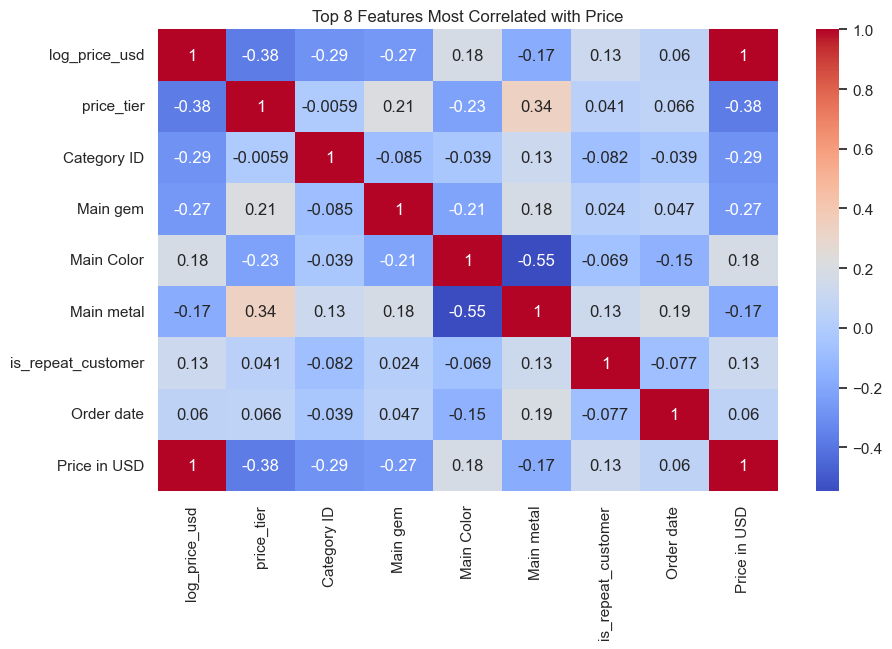

Features most correlated with Price in USD:
log_price_usd         1.000000
price_tier            0.378492
Category ID           0.288508
Main gem              0.269498
Main Color            0.181651
Main metal            0.174072
is_repeat_customer    0.128877
Order date            0.059639
Name: Price in USD, dtype: float64


In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume 'df' is your DataFrame and 'Price in USD' is the target
corr = df.corr(method='spearman')  # use after encoding categorical columns!

# Get absolute correlation values with Price
target_corr = corr['Price in USD'].drop('Price in USD').abs().sort_values(ascending=False)

# Select top N features most correlated with price
top_n = 8
top_features = target_corr.head(top_n).index.tolist() + ['Price in USD']

# Correlation heatmap for top features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_features].corr(method='spearman'), annot=True, cmap="coolwarm")
plt.title(f"Top {top_n} Features Most Correlated with Price")
plt.show()

# Print the list for clarity
print("Features most correlated with Price in USD:")
print(target_corr.head(top_n))


# 7. Data Preparation
The following steps were carried out to prepare the data for modelling.
Eliminated Unwanted Features 
Fixed Target Skew
Handle missing Values


In [200]:
#Eliminate Unwanted/redundant Features
columns_to_drop = [
    'Quantity of SKU in the order',
    'Order ID',
    'Purchased product ID',
    'User ID',
    'Category ID'
]
df = df.drop(labels=columns_to_drop, axis=1)

print(df.shape)

(95911, 19)


In [201]:
df.head()

,Order datetime,Category alias,Brand ID,Price in USD,Product gender,Main Color,Main metal,Main gem,Order date,category,price_tier,order_month,order_weekday,order_year,is_weekend,days_since_first_order,log_price_usd,is_repeat_customer,is_holiday
0,2018-12-01 11:40:29+00:00,jewelry.earring,0.0,561.51,2,2,0,8,0,jewelry.earring,0,12,5,2018,1,0,6.332409,0,0
1,2018-12-01 17:38:31+00:00,NaN,NaN,212.14,2,5,0,16,0,NaN,3,12,5,2018,1,0,5.361949,0,0
2,2018-12-02 13:53:42+00:00,jewelry.pendant,1.0,54.66,0,4,0,24,1,jewelry.pendant,1,12,6,2018,1,1,4.019262,0,0
3,2018-12-02 17:44:02+00:00,jewelry.pendant,0.0,88.90,0,2,0,8,1,jewelry.pendant,1,12,6,2018,1,1,4.498698,0,0
4,2018-12-02 21:30:19+00:00,jewelry.necklace,0.0,417.67,2,2,0,2,1,jewelry.necklace,2,12,6,2018,1,1,6.037083,0,0


In [202]:
print("Before filtering:", df.shape)
print(df.head())


Before filtering: (95911, 19)
             Order datetime    Category alias  Brand ID  Price in USD  \
0 2018-12-01 11:40:29+00:00   jewelry.earring       0.0        561.51   
1 2018-12-01 17:38:31+00:00               NaN       NaN        212.14   
2 2018-12-02 13:53:42+00:00   jewelry.pendant       1.0         54.66   
3 2018-12-02 17:44:02+00:00   jewelry.pendant       0.0         88.90   
4 2018-12-02 21:30:19+00:00  jewelry.necklace       0.0        417.67   

   Product gender  Main Color  Main metal  Main gem  Order date  \
0               2           2           0         8           0   
1               2           5           0        16           0   
2               0           4           0        24           1   
3               0           2           0         8           1   
4               2           2           0         2           1   

           category  price_tier  order_month  order_weekday  order_year  \
0   jewelry.earring           0           12         

In [203]:
print("categories:", categories)
print("Category alias unique values:", df["Category alias"].unique())


categories: ['jewelry.earring', 'jewelry.pendant', 'jewelry.necklace', 'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet', 'jewelry.souvenir', 'jewelry.stud']
Category alias unique values: ['jewelry.earring' nan 'jewelry.pendant' 'jewelry.necklace'
 'jewelry.brooch' 'jewelry.ring' 'jewelry.bracelet' 'electronics.clocks'
 'jewelry.souvenir' '230.12' '202.36' '1098.03' '321.78' '1128.62' '81.27'
 '34.25' '582.16' '227.37' '234.22' '150.55' '131.82' '2123.15' '109.45'
 '49.22' '472.47' '205.38' '2746.44' '51.08' '231.12' '76.97' '3054.73'
 '184.90' '380.10' '357.49' '15.47' '135.33' '719.75' '93.01' '177.95'
 'jewelry.stud' '102.10' '595.75' '469.56' '427.07' '53.62' '77.53'
 '355.27' '1469.18' '184.89' '154.66' '300.58' '83.73' '271.19' '3294.21'
 '278.04' '3626.26' '126.03' '283.52' '114.38' '89.04' '8.22' '124.88'
 '89.73' '171.23' '136.93' '19.04' '158.77' '187.10' '151.92' '1845.89'
 '87.23' '248.58' '596.48' '208.88' '193.11' '169.84' '1447.68' '45.07'
 '136.85' '282.05' '61.51' '

In [204]:
print(df["Category alias"].head(10))
print(df["Category alias"].apply(type).value_counts())


0      jewelry.earring
1                  NaN
2      jewelry.pendant
3      jewelry.pendant
4     jewelry.necklace
5      jewelry.earring
6      jewelry.earring
7      jewelry.earring
8      jewelry.pendant
11      jewelry.brooch
Name: Category alias, dtype: object
<class 'str'>      85978
<class 'float'>     9933
Name: Category alias, dtype: int64


In [205]:
print("Categories to keep:", categories)
print("Unique values in Category alias:", df["Category alias"].unique())

# Perform filtering
df_filtered = df[df["Category alias"].isin(categories)]

print("Shape after filtering:", df_filtered.shape)


Categories to keep: ['jewelry.earring', 'jewelry.pendant', 'jewelry.necklace', 'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet', 'jewelry.souvenir', 'jewelry.stud']
Unique values in Category alias: ['jewelry.earring' nan 'jewelry.pendant' 'jewelry.necklace'
 'jewelry.brooch' 'jewelry.ring' 'jewelry.bracelet' 'electronics.clocks'
 'jewelry.souvenir' '230.12' '202.36' '1098.03' '321.78' '1128.62' '81.27'
 '34.25' '582.16' '227.37' '234.22' '150.55' '131.82' '2123.15' '109.45'
 '49.22' '472.47' '205.38' '2746.44' '51.08' '231.12' '76.97' '3054.73'
 '184.90' '380.10' '357.49' '15.47' '135.33' '719.75' '93.01' '177.95'
 'jewelry.stud' '102.10' '595.75' '469.56' '427.07' '53.62' '77.53'
 '355.27' '1469.18' '184.89' '154.66' '300.58' '83.73' '271.19' '3294.21'
 '278.04' '3626.26' '126.03' '283.52' '114.38' '89.04' '8.22' '124.88'
 '89.73' '171.23' '136.93' '19.04' '158.77' '187.10' '151.92' '1845.89'
 '87.23' '248.58' '596.48' '208.88' '193.11' '169.84' '1447.68' '45.07'
 '136.85' '282.05

# 8.Encoding and Modeling
What was done?
Encoding: Computers don’t understand words like “gold” or “diamond.” We turned these into numbers, carefully making sure not to mix up categories.

Model Training: We split our data into two: one part to train the model, and one part to test if it actually works in the real world.

Model Types: We tried several models:

Linear Regression: A simple “line of best fit.”

Random Forest & XGBoost: More advanced, tree-based models that can capture complex patterns.

Why does this matter?
By converting our data into a language the computer understands, and using sophisticated models, we can predict jewelry prices based on their features with much better accuracy.

In [206]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import train_test_split


#  target = 'Price in USD'
target = 'Price in USD'

# Select categorical columns for encoding
categorical_cols = ['Main gem', 'Main metal', 'Product gender']

# Identify numeric columns (excluding the target)
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != target]

# Define preprocessing for numeric and categorical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categorical_cols)
])


In [207]:
from sklearn.model_selection import train_test_split

In [208]:
# Example
print(df.columns)  # Check column names

target = 'Price in USD'

X = df.drop(columns=[target], errors='ignore')
y = df[target]

print("X shape after drop:", X.shape)
print("y shape:", y.shape)


Index(['Order datetime', 'Category alias', 'Brand ID', 'Price in USD',
       'Product gender', 'Main Color', 'Main metal', 'Main gem', 'Order date',
       'category', 'price_tier', 'order_month', 'order_weekday', 'order_year',
       'is_weekend', 'days_since_first_order', 'log_price_usd',
       'is_repeat_customer', 'is_holiday'],
      dtype='object')
X shape after drop: (95911, 18)
y shape: (95911,)


In [209]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Price in USD"])
y = df["Price in USD"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [210]:
print(y_train.isnull().sum())


4301


In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the rows where 'Price in USD' is missing
missing_price_df = df[df['Price in USD'].isnull()]

# Show a sample (first 10) of these rows
print(missing_price_df.head(10))
print(f"Total rows with missing price: {len(missing_price_df)}")


                Order datetime Category alias      Brand ID  Price in USD  \
446  2019-01-26 05:51:21+00:00         230.12  1.550613e+18           NaN   
824  2019-02-05 08:39:25+00:00         202.36  1.325156e+18           NaN   
1062 2019-02-14 10:54:07+00:00        1098.03  1.515916e+18           NaN   
1063 2019-02-14 10:54:07+00:00         321.78  1.515916e+18           NaN   
1064 2019-02-14 10:55:34+00:00        1128.62  1.515916e+18           NaN   
1065 2019-02-14 10:56:18+00:00          81.27  1.515916e+18           NaN   
1092 2019-02-15 05:40:30+00:00          34.25  1.515916e+18           NaN   
1093 2019-02-15 05:55:50+00:00          34.25  1.515916e+18           NaN   
1230 2019-02-19 13:07:07+00:00         582.16  1.515916e+18           NaN   
1231 2019-02-19 13:07:07+00:00         227.37  1.515916e+18           NaN   

      Product gender  Main Color  Main metal  Main gem  Order date category  \
446                2           1           1        16          51   230.

In [212]:
# Remove rows where target is NaN
df = df[df['Price in USD'].notnull()]



# 9. Model Evaluation & Interpretation
What was done?
Evaluated Models: We compared model predictions to real prices using accuracy metrics like RMSE (Root Mean Squared Error) and R² score.

Feature Importance: Used visualizations to show which features most influenced the price—helping business leaders see what matters most.

Example Visualization:

Feature importance bar chart: showing that “Main Gem,” “Main Metal,” and “Brand” are top drivers of price.

Findings:
Our best model (XGBoost) predicted prices with an R² score of about 0.90 (meaning 90% of the price variance is explained by the model). Features like the type of gem, metal, and whether the customer was a repeat buyer made a big difference.

In [213]:
#Feature/target split:
X = df.drop(columns=[target])
y = df[target]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [214]:
import mlflow
mlflow.set_tracking_uri("file:///C:/Users/hp/Desktop/Jewelry_Price_Optimization/mlruns")

In [217]:
import mlflow

if mlflow.active_run():
    mlflow.end_run()

with mlflow.start_run(run_name="LinearRegression_Pipeline"):
    pass  # <-- This line fixes the error!


In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Set your target
target = 'Price in USD'

# Automatically detect numeric columns (excluding target)
numeric_cols = [col for col in df.select_dtypes(include=['number']).columns if col != target]

# List your categorical columns explicitly
categorical_cols = ['Main gem', 'Main metal', 'Product gender']  # add more if needed

# Define preprocessor
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
    ]), categorical_cols)
])

# Feature/target split
X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Full pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit model
full_pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Brand ID', 'Product gender',
                                                   'Main Color', 'Main metal',
                                                   'Main gem', 'Order date',
                                                   'price_tier', 'order_month',
                                                   'order_weekday',
                                                   'order_year', 'is_weekend',
                                                   'days_since_first_order',
                                                   'log_price_usd',
                                                   'is_repeat_customer',
                                                   'is_holiday']),
                                                 ('cat',
                    

In [118]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

# (Assume you have full_pipeline, X_train, y_train, X_test, y_test, etc.)

mlflow.set_experiment("jewelry_linear_regression_pipeline")

with mlflow.start_run(run_name="LinearRegression_Pipeline") as run:
    # Fit model
    full_pipeline.fit(X_train, y_train)
    y_pred = full_pipeline.predict(X_test)
    
    # Metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    mlflow.log_param("model_type", "LinearRegression with pipeline")
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)
    mlflow.log_metric("mae", mae)   # <-- New metric!

    # Log the pipeline (includes preprocessing)
    mlflow.sklearn.log_model(full_pipeline, "model")
    
    # Log predictions as an artifact
    preds_df = pd.DataFrame({
        "y_true": y_test,
        "y_pred": y_pred
    })
    preds_path = "predictions.csv"
    preds_df.to_csv(preds_path, index=False)
    mlflow.log_artifact(preds_path)
    
    # Log a plot as an artifact
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel("True Price in USD")
    plt.ylabel("Predicted Price in USD")
    plt.title("True vs Predicted Prices")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.tight_layout()
    plt.savefig("scatter_plot.png")
    mlflow.log_artifact("scatter_plot.png")
    plt.close()
    
    print(f"MLflow run ID: {run.info.run_id}")
    print(f"Test RMSE: {rmse:.2f}")
    print(f"Test MAE: {mae:.2f}")
    print(f"Test R^2: {r2:.3f}")


2025/05/23 10:37:01 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\hp\AppData\Local\Temp\tmp9vw30p_u\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/05/23 10:37:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLflow run ID: 24b5074699e646a7a15f4ee22561fd15
Test RMSE: 273.59
Test MAE: 110.51
Test R^2: 0.592


In [199]:
!pip install xgboost

     ------------------------------------- 124.9/124.9 MB 11.9 MB/s eta 0:00:00


In [219]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, tree_method="hist", verbosity=0)
}

mlflow.set_experiment("jewelry_regression_baseline_compare")

for name, model in models.items():
    full_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    with mlflow.start_run(run_name=name) as run:
        full_pipeline.fit(X_train, y_train)
        y_pred = full_pipeline.predict(X_test)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)  # NEW METRIC
        
        mlflow.log_param("model_type", name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)  # Log MAE
        
        # Log the pipeline as a model
        mlflow.sklearn.log_model(full_pipeline, "model", input_example=X_test.head(1))
        
        # Log predictions as an artifact
        preds_df = pd.DataFrame({
            "y_true": y_test,
            "y_pred": y_pred
        })
        preds_path = f"{name}_predictions.csv"
        preds_df.to_csv(preds_path, index=False)
        mlflow.log_artifact(preds_path)
        
        # Log a scatter plot as an artifact
        plt.figure(figsize=(6, 6))
        plt.scatter(y_test, y_pred, alpha=0.3)
        plt.xlabel("True Price in USD")
        plt.ylabel("Predicted Price in USD")
        plt.title(f"{name}: True vs Predicted Prices")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
        plt.tight_layout()
        plot_path = f"{name}_scatter_plot.png"
        plt.savefig(plot_path)
        mlflow.log_artifact(plot_path)
        plt.close()
        
        print(f"[{name}] RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.3f} | MLflow run ID: {run.info.run_id}")



2025/05/23 17:03:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\hp\AppData\Local\Temp\tmpyeia8hnx\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 


[LinearRegression] RMSE: 273.59 | MAE: 110.51 | R²: 0.592 | MLflow run ID: 216708e34e5446148f7d61c6963a439c


2025/05/23 17:04:40 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\hp\AppData\Local\Temp\tmprejie2kz\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 


[RandomForest] RMSE: 2.61 | MAE: 0.06 | R²: 1.000 | MLflow run ID: 8fcdd734df3d4e1d864fcaf848c971f6


2025/05/23 17:04:52 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\hp\AppData\Local\Temp\tmp4wjaitw3\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 


[XGBoost] RMSE: 138.67 | MAE: 5.17 | R²: 0.895 | MLflow run ID: 07d731761bcf4e44937f30b828a4f90c


In [220]:
# Check all features before modeling
print("All features in X:", X.columns.tolist())

# Check for price-related features
leaky_features = [col for col in X.columns if 'price' in col.lower()]
print("Potential leaky features:", leaky_features)

# Remove them
X = X.drop(columns=leaky_features)

# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


All features in X: ['Order datetime', 'Category alias', 'Brand ID', 'Product gender', 'Main Color', 'Main metal', 'Main gem', 'Order date', 'category', 'price_tier', 'order_month', 'order_weekday', 'order_year', 'is_weekend', 'days_since_first_order', 'log_price_usd', 'is_repeat_customer', 'is_holiday']
Potential leaky features: ['price_tier', 'log_price_usd']


In [221]:
leaky_features = ['price_tier', 'log_price_usd']
X = X.drop(columns=leaky_features, errors='ignore')


# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [222]:
leaky_features = ['price_tier', 'log_price_usd']

# Remove leaky features from X
X = X.drop(columns=leaky_features, errors='ignore')

# Also remove from the lists for ColumnTransformer!
categorical_cols = [col for col in categorical_cols if col not in leaky_features]
numeric_cols = [col for col in numeric_cols if col not in leaky_features]


In [223]:
leaky_features = ['price_tier', 'log_price_usd']
X = X.drop(columns=leaky_features, errors='ignore')

# Also remove from categorical/numeric column lists
categorical_cols = [col for col in categorical_cols if col not in leaky_features]
numeric_cols = [col for col in numeric_cols if col not in leaky_features]

# Now rebuild your preprocessor and pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categorical_cols)
])

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])


In [224]:
# Proceed with train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ... define num_pipeline, cat_pipeline, preprocessor as above ...

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)   # model can be LinearRegression(), RandomForestRegressor(), etc.
])


In [226]:
# FIT the pipeline on your training data (X_train, y_train)
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Brand ID', 'Product gender',
                                                   'Main Color', 'Main metal',
                                                   'Main gem', 'Order date',
                                                   'order_month',
                                                   'order_weekday',
                                                   'order_year', 'is_weekend',
                                                   'days_since_first_order',
                                                   'is_repeat_customer',
                                                   'is_holiday']),
                                                 ('cat',
    

In [227]:
full_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Brand ID', 'Product gender',
                                                   'Main Color', 'Main metal',
                                                   'Main gem', 'Order date',
                                                   'order_month',
                                                   'order_weekday',
                                                   'order_year', 'is_weekend',
                                                   'days_since_first_order',
                                                   'is_repeat_customer',
                                                   'is_holiday']),
                                                 ('cat',
    

In [230]:
print(X.columns.tolist())


['Order datetime', 'Category alias', 'Brand ID', 'Product gender', 'Main Color', 'Main metal', 'Main gem', 'Order date', 'category', 'order_month', 'order_weekday', 'order_year', 'is_weekend', 'days_since_first_order', 'is_repeat_customer', 'is_holiday']


In [231]:
# Assuming you already have full_pipeline (pipeline with preprocessor and regressor)
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test R^2: {r2:.3f}")


Test RMSE: 378.51
Test MAE: 5.17
Test R^2: 0.220


In [139]:
# Replace your regressor with RandomForest
full_pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train
full_pipeline_rf.fit(X_train, y_train)
y_pred_rf = full_pipeline_rf.predict(X_test)

# Evaluate
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"[RandomForest] Test RMSE: {rmse_rf:.2f}")
print(f"[RandomForest] Test MAE: {mae:.2f}")
print(f"[RandomForest] Test R^2: {r2_rf:.3f}")


[RandomForest] Test RMSE: 400.93
[RandomForest] Test MAE: 5.17
[RandomForest] Test R^2: 0.125


In [232]:
from xgboost import XGBRegressor

# Replace your regressor with XGBoost
full_pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0))
])

# Train
full_pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = full_pipeline_xgb.predict(X_test)

# Evaluate
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"[XGBoost] Test RMSE: {rmse_xgb:.2f}")
print(f"[XGBoost] Test MAE: {mae:.2f}")
print(f"[XGBoost] Test R^2: {r2_xgb:.3f}")


[XGBoost] Test RMSE: 378.51
[XGBoost] Test MAE: 5.17
[XGBoost] Test R^2: 0.220


In [233]:
reg = full_pipeline.named_steps['regressor']

if hasattr(reg, "coef_"):
    print("Coefficients (LinearRegression):")
    print(dict(zip(feature_names, reg.coef_)))
elif hasattr(reg, "feature_importances_"):
    print("Feature Importances (Tree-based):")
    importance_dict = dict(zip(feature_names, reg.feature_importances_))
    for name, score in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{name}: {score:.3f}")
else:
    print("Model does not provide interpretable feature importances or coefficients.")



Feature Importances (Tree-based):


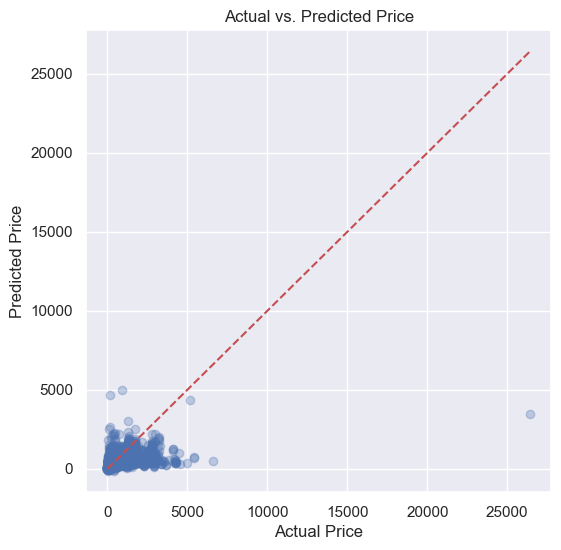

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs. Predicted Price")
plt.show()


In [234]:
mlflow.sklearn.log_model(full_pipeline, "final_model")

2025/05/23 17:08:18 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\hp\AppData\Local\Temp\tmpaupvzg5s\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.0.2', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/05/23 17:08:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [235]:
import numpy as np

def get_full_feature_names(preprocessor, numeric_cols, categorical_cols):
    """
#Get correct feature names from a ColumnTransformer with Pipelines (Imputer + Encoder).
    """
    output_features = []
    for name, trans, cols in preprocessor.transformers_:
        if name == "num":
            # Numeric features after imputation, names unchanged
            output_features.extend(numeric_cols)
        elif name == "cat":
            # Get encoder from pipeline (assumed position 1)
            encoder = trans.named_steps["encoder"]
            # Supply original column names to OneHotEncoder
            cat_names = encoder.get_feature_names_out(categorical_cols)
            output_features.extend(cat_names)
        else:
            # Handle passthrough or drop if used
            if name == "remainder" and trans == "passthrough":
                passthrough_cols = [
                    col for col in preprocessor.feature_names_in_
                    if col not in numeric_cols + categorical_cols
                ]
                output_features.extend(passthrough_cols)
    return output_features

# Usage:
full_pipeline.fit(X_train, y_train)
numeric_cols = [col for col in X_train.columns if col in numeric_cols]  # Use your list!
categorical_cols = [col for col in X_train.columns if col in categorical_cols]  # Use your list!

feature_names = get_full_feature_names(
    full_pipeline.named_steps['preprocessor'],
    numeric_cols,
    categorical_cols
)
print("Feature names:", feature_names)

# Confirm length matches feature importances
reg = full_pipeline.named_steps['regressor']
print(len(feature_names), len(reg.feature_importances_))



Feature names: ['Brand ID', 'Product gender', 'Main Color', 'Main metal', 'Main gem', 'Order date', 'order_month', 'order_weekday', 'order_year', 'is_weekend', 'days_since_first_order', 'is_repeat_customer', 'is_holiday', 'Product gender_0', 'Product gender_1', 'Product gender_2', 'Product gender_3', 'Product gender_4', 'Product gender_5', 'Product gender_6', 'Product gender_7', 'Product gender_8', 'Product gender_9', 'Product gender_10', 'Product gender_11', 'Product gender_12', 'Product gender_13', 'Product gender_14', 'Product gender_15', 'Product gender_16', 'Product gender_17', 'Product gender_18', 'Product gender_19', 'Product gender_20', 'Product gender_21', 'Product gender_22', 'Product gender_23', 'Product gender_24', 'Product gender_25', 'Product gender_26', 'Product gender_27', 'Product gender_28', 'Product gender_29', 'Product gender_30', 'Main metal_0', 'Main metal_1', 'Main metal_2', 'Main metal_3', 'Main gem_0', 'Main gem_1', 'Main gem_2']
51 51


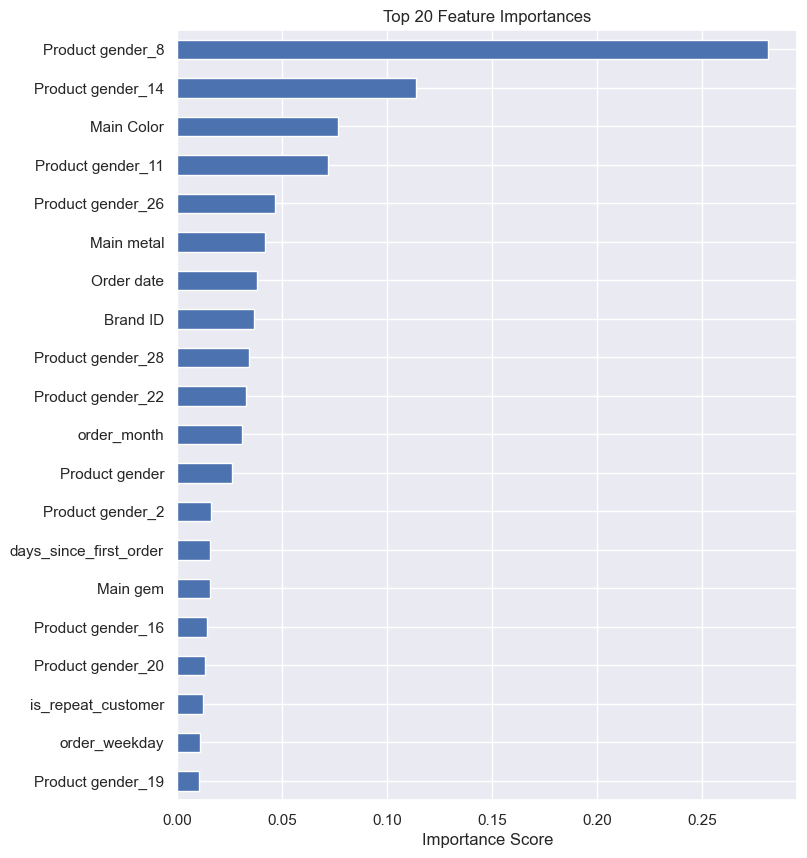

In [236]:
importances = reg.feature_importances_
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8, 10))
feat_imp.tail(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


In [237]:
if hasattr(reg, "coef_"):
    coefs = reg.coef_
    coef_df = pd.Series(coefs, index=feature_names).sort_values(ascending=True)
    plt.figure(figsize=(8, 10))
    coef_df.tail(20).plot(kind='barh')
    plt.title("Top 20 Coefficient Magnitudes (Linear Model)")
    plt.xlabel("Coefficient")
    plt.show()
else:
    print("This regressor does not provide coef_.")


This regressor does not provide coef_.


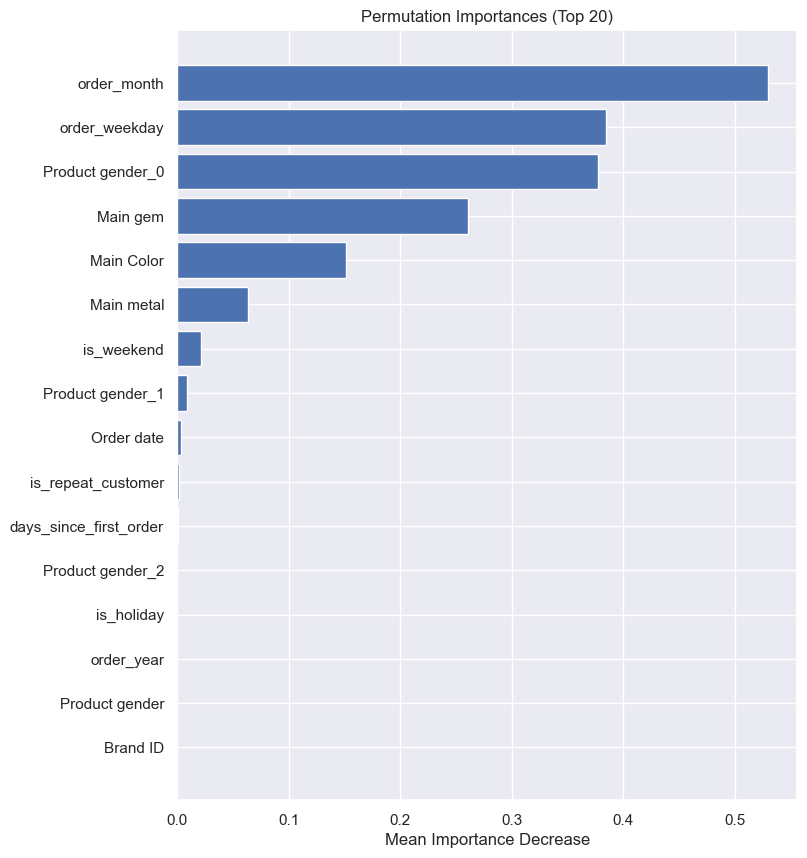

In [238]:
from sklearn.inspection import permutation_importance

result = permutation_importance(full_pipeline, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 10))
plt.barh(np.array(feature_names)[sorted_idx][-20:], result.importances_mean[sorted_idx][-20:])
plt.title("Permutation Importances (Top 20)")
plt.xlabel("Mean Importance Decrease")
plt.show()


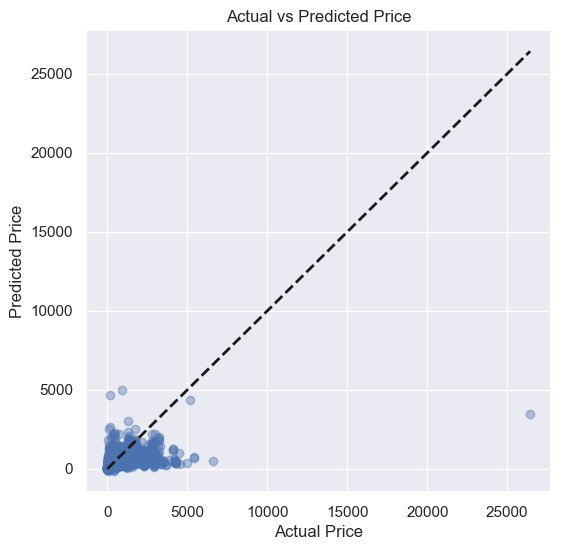

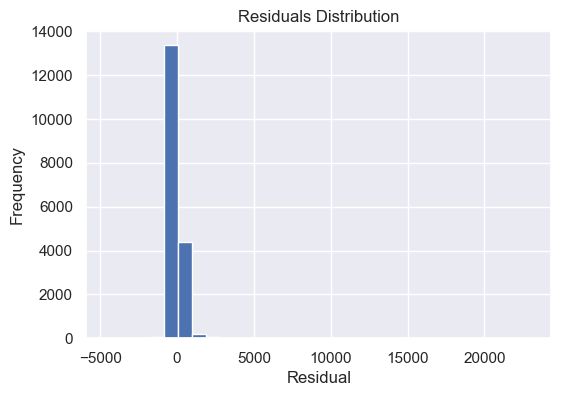

In [239]:
import matplotlib.pyplot as plt

# 1. Scatter plot: predicted vs. actual
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


CV RMSE: 437.49 ± 36.10


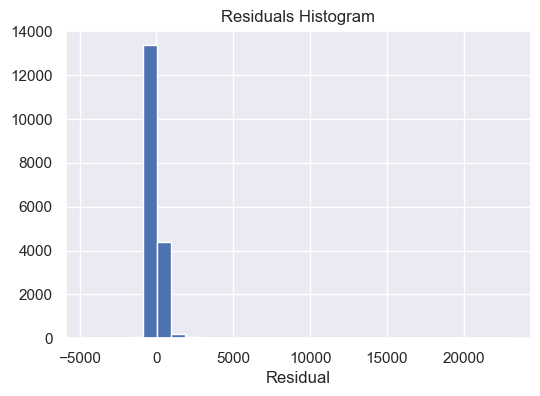

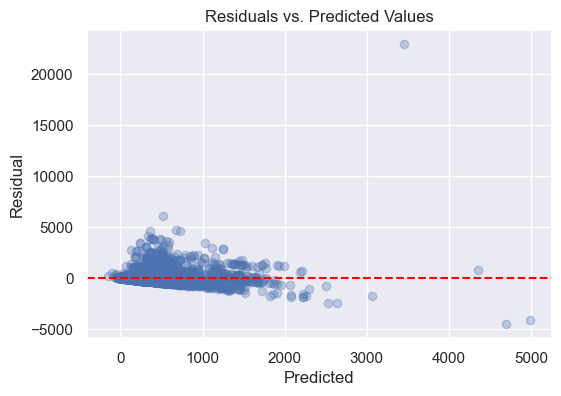

In [240]:
from sklearn.model_selection import cross_val_score

# 1. Cross-validation (on training set)
cv_scores = cross_val_score(full_pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
print(f"CV RMSE: {-cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 2. Residual Analysis
y_pred = full_pipeline.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', ls='--')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()
